In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

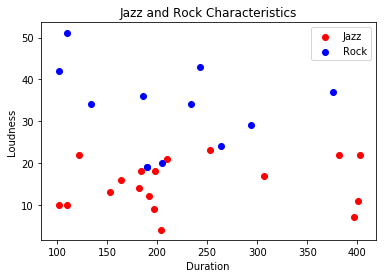

In [2]:
music = pd.DataFrame()

music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

plt.scatter(
music[music['jazz']==1].duration,
music[music['jazz']==1].loudness,
color='red')

plt.scatter(
music[music['jazz']==0].duration,
music[music['jazz']==0].loudness,
color='blue')

plt.legend(['Jazz','Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [5]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X=music[['loudness','duration']]
Y=music[['jazz']]
neighbors.fit(X,Y)

neighbors.predict([[24,190]])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


array([0])

In [8]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X=music[['loudness','duration']]
Y=music[['jazz']]
neighbors.fit(X,Y)

print(neighbors.predict([[24,190]]))
print(neighbors.predict_proba([[24,190]]))

[1]
[[0.4 0.6]]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


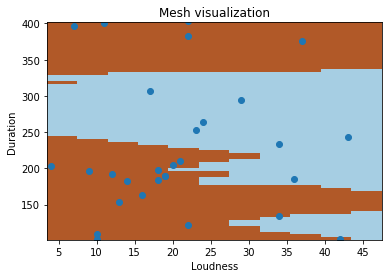

In [30]:
X = np.array(X)
Y = np.array(Y)

h = 4.0

x_min=X[:,0].min()-.5
x_max=X[:,0].max()+.5
y_min=X[:,1].min()-.5
y_max=X[:,1].max()+.5
xx,yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

Z=Z.reshape(xx.shape)
plt.figure(1,figsize=(6,4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx,yy,Z)

plt.scatter(X[:,0],X[:,1])
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

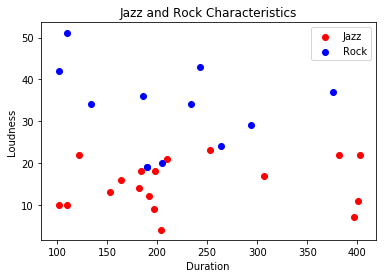

In [31]:
music = pd.DataFrame()

music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

plt.scatter(
music[music['jazz']==1].duration,
music[music['jazz']==1].loudness,
color='red')

plt.scatter(
music[music['jazz']==0].duration,
music[music['jazz']==0].loudness,
color='blue')

plt.legend(['Jazz','Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [82]:
dur=300
loud=11

music['diff'] = np.sqrt(((music['duration']-dur)**2) + ((music['loudness']-loud)**2))
music.sort_values('diff',ascending=True)

,duration,loudness,jazz,diff
12,307,17,1,9.219544
6,294,29,0,18.973666
9,264,24,0,38.275318
23,253,23,1,48.507731
2,243,43,0,65.368188
24,234,34,0,69.892775
28,376,37,0,80.324343
7,382,22,1,82.734515
18,210,21,1,90.553851
10,205,20,0,95.425364


The first row shows the nearest neighbor to the new value (dur,loud).  For this particular example, the new point would be jazz.